In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
#Loading Data
op_data = pd.read_csv('/content/onlinefraud.csv')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Checking First 5 rows
op_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#checking for null columns
op_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
op_data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
op_data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
op_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
op_data['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
legit = op_data[op_data.isFraud == 0]
fraud = op_data[op_data.isFraud == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(6354407, 11)
(8213, 11)


In [ ]:
legit.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [ ]:
legit.amount.describe()

,amount
count,6.354407e+06
mean,1.781970e+05
std,5.962370e+05
min,1.000000e-02
25%,1.336840e+04
50%,7.468472e+04
75%,2.083648e+05
max,9.244552e+07


In [ ]:
fraud.amount.describe()

,amount
count,8.213000e+03
mean,1.467967e+06
std,2.404253e+06
min,0.000000e+00
25%,1.270913e+05
50%,4.414234e+05
75%,1.517771e+06
max,1.000000e+07


In [ ]:
legit_sample = legit.sample(n=2592)

In [ ]:
legit_sample_1 = legit.sample(n=8213)

In [ ]:
new_dataset = pd.concat([legit_sample_1, fraud], axis=0)

In [ ]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5840533,402,CASH_OUT,55857.31,C1732825120,11045.0,0.00,C1378182008,17845.40,73702.71,0,0
2906945,228,PAYMENT,21391.56,C749599177,0.0,0.00,M1950751841,0.00,0.00,0,0
2624991,208,CASH_IN,59362.87,C1991347570,615145.9,674508.77,C42779935,3799715.08,3740352.21,0,0
4527751,326,PAYMENT,16134.80,C1884861748,0.0,0.00,M1534587047,0.00,0.00,0,0
1629902,157,CASH_OUT,131889.54,C1413095548,0.0,0.00,C1786468821,1238333.93,1370223.48,0,0


In [ ]:
temp_dataset = new_dataset.drop(columns=['isFlaggedFraud', 'type', 'nameOrig', 'nameDest'], axis=1)

In [ ]:
temp_dataset.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
5840533,402,55857.31,11045.0,0.00,17845.40,73702.71,0
2906945,228,21391.56,0.0,0.00,0.00,0.00,0
2624991,208,59362.87,615145.9,674508.77,3799715.08,3740352.21,0
4527751,326,16134.80,0.0,0.00,0.00,0.00,0
1629902,157,131889.54,0.0,0.00,1238333.93,1370223.48,0


In [ ]:
temp_dataset.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362615,743,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,850002.52,850002.52,0.0,0.00,0.00,1
6362619,743,850002.52,850002.52,0.0,6510099.11,7360101.63,1


In [ ]:
temp_dataset.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0,246.259832,1.784514e+05,8.172788e+05,841103.769620,1.161435e+06,1.285368e+06
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06


In [ ]:
temp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 5840533 to 6362619
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   amount          16426 non-null  float64
 2   oldbalanceOrg   16426 non-null  float64
 3   newbalanceOrig  16426 non-null  float64
 4   oldbalanceDest  16426 non-null  float64
 5   newbalanceDest  16426 non-null  float64
 6   isFraud         16426 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [ ]:
X = temp_dataset.drop(columns='isFraud', axis=1)
Y = temp_dataset['isFraud']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(16426, 6) (13140, 6) (3286, 6)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9052511415525114


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9059646987218503


Some More Important Metrics

In [58]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt

We Have to Create Another Dataset with orignial unbalanced values to calculate our models effciency on different other metrics such as precision, recall, F1-score, and AUC-ROC by Logisitc Regression


In [68]:
temp2_dataset = pd.concat([legit, fraud], axis=0)

In [69]:
temp2_dataset = temp2_dataset.drop(columns=['isFlaggedFraud', 'type', 'nameOrig', 'nameDest'], axis=1)

In [70]:
temp2_dataset.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0
5,1,7817.71,53860.0,46042.29,0.0,0.0,0
6,1,7107.77,183195.0,176087.23,0.0,0.0,0


In [72]:
x = temp2_dataset.drop(columns='isFraud', axis=1)
y = temp2_dataset['isFraud']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [76]:
model2 = LogisticRegression()

In [77]:
model2.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
# Generate predictions (classes and probabilities)
y_pred1 = model2.predict(x_test)  # Predicted classes (0 or 1)
y_pred_proba1 = model2.predict_proba(x_test)[:, 1]  # Probabilities for class 1 (fraud)

In [83]:
# Calculate metrics
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f11 = f1_score(y_test, y_pred1)
auc_roc1 = roc_auc_score(y_test, y_pred_proba1)

In [84]:
#Confusion Matrix
conf_matrix1 = confusion_matrix(y_test, y_pred1)

In [85]:
# Classification report (includes precision/recall/F1)
class_report1 = classification_report(y_test, y_pred1)

In [86]:
# Print results
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")
print(f"F1-Score: {f11:.4f}")
print(f"AUC-ROC: {auc_roc1:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix1)
print("\nClassification Report:")
print(class_report1)

Precision: 0.3559
Recall: 0.4157
F1-Score: 0.3835
AUC-ROC: 0.8735

Confusion Matrix:
[[1269645    1236]
 [    960     683]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.36      0.42      0.38      1643

    accuracy                           1.00   1272524
   macro avg       0.68      0.71      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524



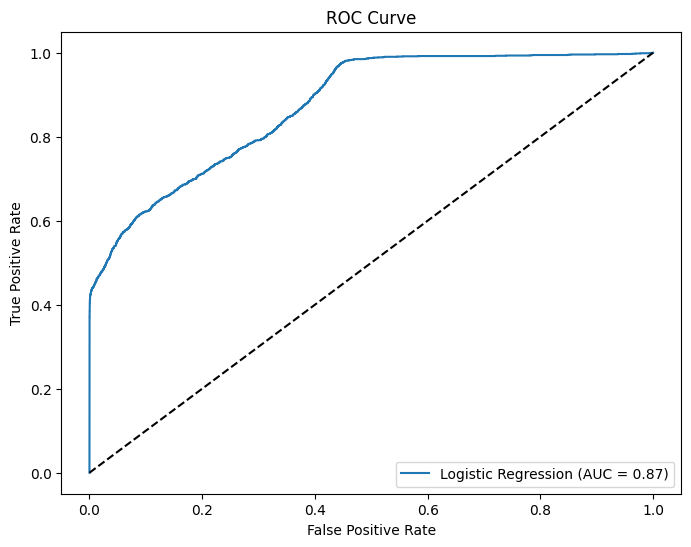

In [88]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_roc1:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

calculate our models effciency on different other metrics such as precision, recall, F1-score, and AUC-ROC by Random forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Prevent overfitting
    class_weight='balanced',  # Handles imbalance (use if testing on original data)
    random_state=42
)
rf_model.fit(x_train, y_train)

In [ ]:
# Generate predictions (classes and probabilities)
y_pred1 = rf_model.predict(x_test)  # Predicted classes (0 or 1)
y_pred_proba1 = rf_model.predict_proba(x_test)[:, 1]  # Probabilities for class 1 (fraud)

In [ ]:
# Calculate metrics
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f11 = f1_score(y_test, y_pred1)
auc_roc1 = roc_auc_score(y_test, y_pred_proba1)

In [ ]:
#Confusion Matrix
conf_matrix1 = confusion_matrix(y_test, y_pred1)

In [ ]:
# Classification report (includes precision/recall/F1)
class_report1 = classification_report(y_test, y_pred1)

In [ ]:
# Print results
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")
print(f"F1-Score: {f11:.4f}")
print(f"AUC-ROC: {auc_roc1:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix1)
print("\nClassification Report:")
print(class_report1)

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_roc1:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()